In [21]:
import numpy as np
import matplotlib.pyplot as plt
from ising1d import compute_energy1d, run_ising1d, compute_magnetisation1d

def plot_state(state):
    state_for_plotting = np.tile((state + 1) / 2, (10,1))
    plt.figure()
    plt.imshow(state_for_plotting, cmap='gray')

In [2]:
def plot_state(state):
    state_for_plotting = np.tile((state + 1) / 2, (10,1))
    plt.imshow(state_for_plotting, cmap='gray')

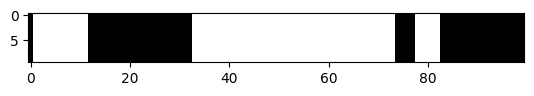

In [3]:
final_stateT05 = run_ising1d(N=100, T=0.5, niters=100000)[0][0,:]
plot_state(final_stateT05)

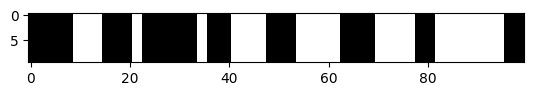

In [4]:
final_stateT1 = run_ising1d(N=100, T=1, niters=100000)[0][0,:]
plot_state(final_stateT1)

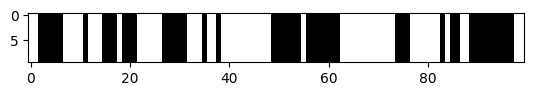

In [5]:
final_stateT2 = run_ising1d(N=100, T=2, niters=100000)[0][0,:]
plot_state(final_stateT2)

In [44]:
# temperatures = np.logspace(-1, 1.5, 20)
# energies_T = []
# delta_energies_T = []
# for t in temperatures:
#     energies = []
#     for i in range(5):
#         (states, magnetisation, energy) = run_ising1d(T=t, N=100, niters = 200000, nsamples=10000, evaluate_functions=[sum, compute_energy1d])
#         energies.append(np.mean(energy))
#     energies_T.append(np.mean(energies))
#     delta_energies_T.append(np.std(energies) / len(energies))
N=100
niters = 200000
nsamples = 20000
npoints = 50


temperatures = np.logspace(-1, 1.5, npoints)
magnetisations = []
energies = []
energy_squareds = []
delta_magnetisations = []
delta_energies = []
delta_energy_squareds = []

for t in temperatures:
    (states, magnetisation, energy) = run_ising1d(T=t, N=N, niters = niters, nsamples=nsamples, evaluate_functions=[compute_magnetisation1d, compute_energy1d])
    magnetisations.append(np.mean(magnetisation))
    energies.append(np.mean(energy))
    energy_squareds.append(np.mean(energy*energy))
    
    delta_magnetisations.append(np.std(magnetisation) / len(magnetisation))
    delta_energies.append(np.std(energy) / len(energy))
    delta_energy_squareds.append(np.std(energy*energy)/len(energy))

[-100.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, -100.0, -97.6672, -96.4464, -99.6806, -95.7738, -95.4834, -92.3116, -86.24, -83.8682, -78.4968, -73.1392, -69.546, -64.4806, -59.4976, -51.7946, -47.822, -44.8424, -39.6246, -35.045, -32.3784, -28.384, -24.8812, -23.195, -20.3434, -18.161, -17.2368, -14.1906, -12.9668, -11.0018, -9.8718, -9.351, -7.7944, -7.0204, -7.0094, -5.6348, -4.827, -4.2214, -4.429, -2.5438, -2.4432]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.899045610562668e-05, 6.366959714023642e-05, 5.4212167453441665e-05, 4.619614594314119e-05, 0.00015742557320842126, 0.00017545729850878246, 0.00024160298011407063, 0.0002526233795593749, 0.0002535960851432845, 0.0003129401834216885, 0.0003642810865252271, 0.00035964504598284125, 0.000413890064630694, 0.0004126215300974975, 0.0004426113306276738, 0.0004399521628540994, 0.0004491076564700273, 0.0004913307821620787, 0.0004627029647624921, 0.0004866778811493286, 0.0004665562306946506, 

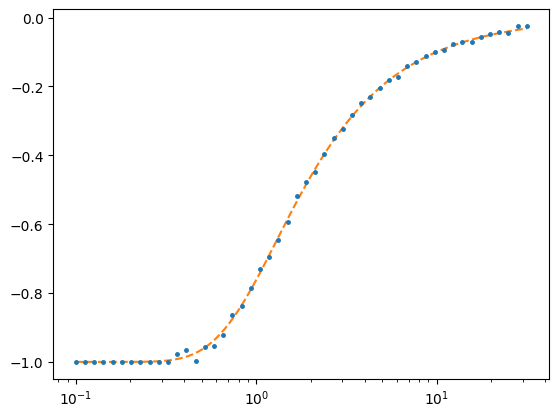

In [46]:

energy_Ns = np.array(energies)/N

plt.figure()

x_exact = np.logspace(-1,1.5, 101)
y_exact = -np.tanh(1/x_exact)
plt.plot(x_exact, y_exact, linestyle='--', color='C1')

plt.errorbar(temperatures, energy_Ns, yerr=np.array(delta_energies), fmt='.',markersize=5, color='C0')
plt.xscale('log')

print(energies)
print(delta_energies)



In [49]:
entropies = np.zeros(len(energies))

entropies[0] = np.log(2)
for i in range(1,npoints):
    entropies[i] = entropies[i-1] + (energies[i] - energies[i-1]) * (temperatures[i] + temperatures[i-1]) / (2*temperatures[i]*temperatures[i-1])

    

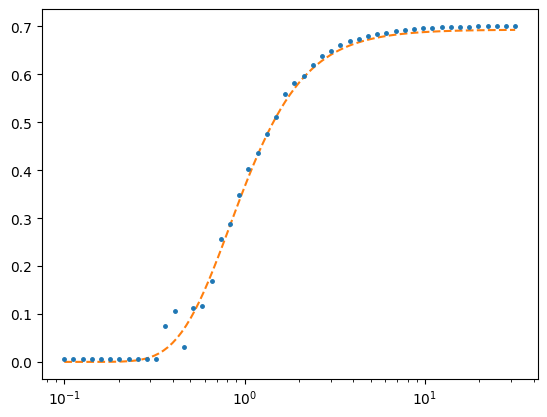

In [50]:
def s_exact(T, epsilon=1, k=1):
    beta = 1/(k*T)
    return (epsilon / T * (1 - np.tanh(beta*epsilon)) + k * np.log(1+np.exp(-2*beta*epsilon)))


plt.figure()

x_exact = np.logspace(-1,1.5, 101)
y_exact = s_exact(x_exact)
plt.plot(x_exact, y_exact, linestyle='--', color='C1')

plt.errorbar(temperatures, entropies/N, fmt='.',markersize=5, color='C0')
plt.xscale('log')


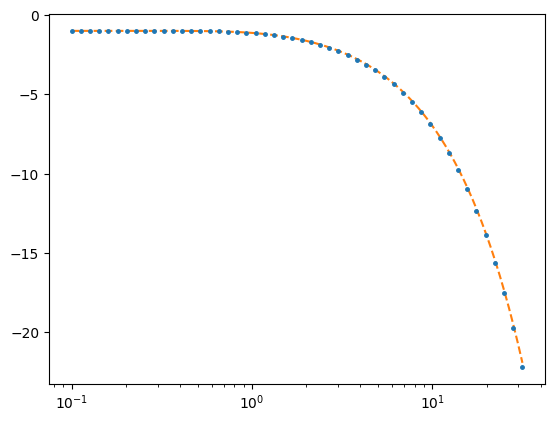

In [51]:
fs = energies - temperatures * entropies

def f_exact(T, epsilon=1, k=1):
    beta = 1/(k*T)
    return -epsilon - k * T * np.log(1+np.exp(-2*epsilon*beta))



plt.figure()

x_exact = np.logspace(-1,1.5, 101)
y_exact = f_exact(x_exact)
plt.plot(x_exact, y_exact, linestyle='--', color='C1')

plt.errorbar(temperatures, fs/N, fmt='.',markersize=5, color='C0')
plt.xscale('log')

<class 'list'>
<class 'list'>
<class 'numpy.ndarray'>


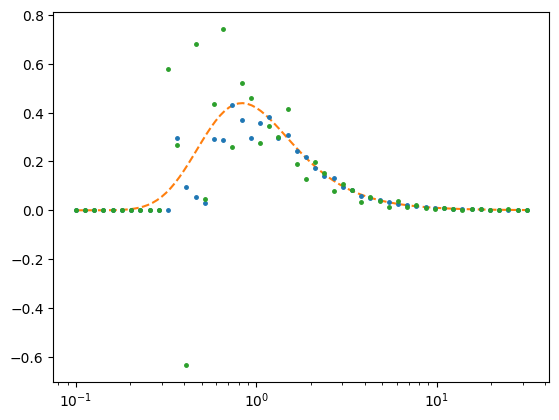

In [58]:
print(type(energies))
print(type(energy_squareds))
print(type(temperatures))

Cs = (np.array(energy_squareds) - np.array(energies)**2) / (temperatures**2)

def c_exact(T, epsilon=1, k=1):
    beta = 1/(k*T)
    return epsilon**2 * beta / (T * np.cosh(beta * epsilon)**2)

Cs2 = np.zeros(len(temperatures))
Cs2[0] = (energies[1] - energies[0]) / (temperatures[1]-temperatures[0])
for i in range(1,len(Cs2)-1):
    Cs2[i] = (energies[i+1] - energies[i]) / (temperatures[i+1]-temperatures[i])
# Cs2[-1] = (energies[-1] - energies[-2]) / (temperatures[-1] - temperatures[-2])


plt.figure()

x_exact = np.logspace(-1,1.5, 101)
y_exact = c_exact(x_exact)
plt.plot(x_exact, y_exact, linestyle='--', color='C1')

plt.errorbar(temperatures, Cs/N, fmt='.',markersize=5, color='C0')
plt.errorbar(temperatures, Cs2/N, fmt='.',markersize=5, color='C2')
plt.xscale('log')
